#  Modelo de Segmentação de Clientes
O modelo de Segmentação de Clientes tem o objetivo de agrupar clientes com caracteristicas comportamentais semelhantes e definir seu perfil de compra.

In [1]:
# Importando bibliotecas
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#### Exploração de dados
Verificamos as informações dos dados, se possui dados nulos, quais os tipos de dados e qual os valores que ele possui.

In [2]:
db =  pd.read_csv('marketing_campaign.csv',sep='\t')

print('\nInformações sobre a base de dados \n')
print(db.info())  
print('\nQuantidade de valores nulos\n')
print(db.isnull().sum()) 
print('\nDescrição e metricas\n')
print(db.describe()) 



Informações sobre a base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  N

#### Indicadores e gráficos informativos
Na exploração de dados tentamos entender como os dados estam organizados utilizando indicadores e gráficos

In [3]:
valor_medio = round(db['Income']. mean())
db['Income'] = db['Income']. fillna(valor_medio)

qtd_rec = db.groupby('Complain').count().iloc[1]['ID']
print('\nQuantidade de Reclamações:',qtd_rec)

print('\nQuantidade de Clientes: ',db.count().values[0])
''
print('\nMedia de crianças em casa: ',round(db['Kidhome'].mean(),2))
print('\nMedia de adolescentes em casa: ',round(db['Teenhome'].mean(),2))

db['Dt_Customer'] = pd.to_datetime(db['Dt_Customer'], format='%d-%m-%Y')
print('\nData de entrada do cliente mais novo:',db['Dt_Customer'].max())
print('\nData de entrada do cliente mais antigo:',db['Dt_Customer'].min())

now = datetime.now()
idade = (now.year - db['Year_Birth'])
print('\nIdade média dos Clientes: ',round(idade.mean()),'anos')

qtd_clientes = db['MntWines'] + db['MntFruits'] + db['MntMeatProducts'] + db['MntFishProducts'] + db['MntSweetProducts'] + db['MntGoldProds'] 
print('\nMaior valor Gasto: ',qtd_clientes.max())
print('\nMenor valor Gasto: ',qtd_clientes.min())

qtd_camp = db['AcceptedCmp1'] + db['AcceptedCmp2'] + db['AcceptedCmp3'] + db['AcceptedCmp4'] + db['AcceptedCmp5'] 
print('\nMaior quantidade de campanhas aceitas: ',qtd_camp.max())
print('\nMenor quantidade de campanhas aceitas: ',qtd_camp.min())


print('\nMaior Quantidade de vendas pela web:',db['NumWebPurchases'].max(),
      '\nMaior Quantidade de vendas pelo Catalogo:',db['NumCatalogPurchases'].max(),
      '\nMaior Quantidade de vendas pela Loja:',db['NumStorePurchases'].max())

print('\nMédia de visitas mensal no website: ', round(db['NumWebVisitsMonth'].mean(),2))

db['Monetary'] = db['MntWines'] + db['MntFruits'] + db['MntMeatProducts'] + db['MntFishProducts'] +db['MntSweetProducts'] + db['MntGoldProds']


Quantidade de Reclamações: 21

Quantidade de Clientes:  2240

Media de crianças em casa:  0.44

Media de adolescentes em casa:  0.51

Data de entrada do cliente mais novo: 2014-06-29 00:00:00

Data de entrada do cliente mais antigo: 2012-07-30 00:00:00

Idade média dos Clientes:  53 anos

Maior valor Gasto:  2525

Menor valor Gasto:  5

Maior quantidade de campanhas aceitas:  4

Menor quantidade de campanhas aceitas:  0

Maior Quantidade de vendas pela web: 27 
Maior Quantidade de vendas pelo Catalogo: 28 
Maior Quantidade de vendas pela Loja: 13

Média de visitas mensal no website:  5.32


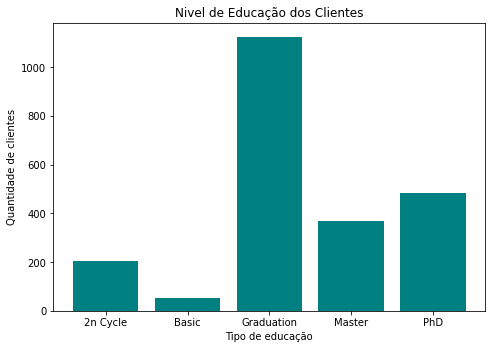

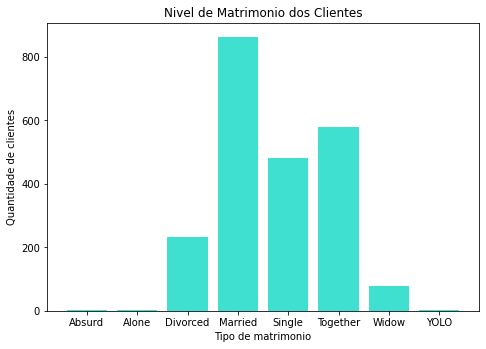

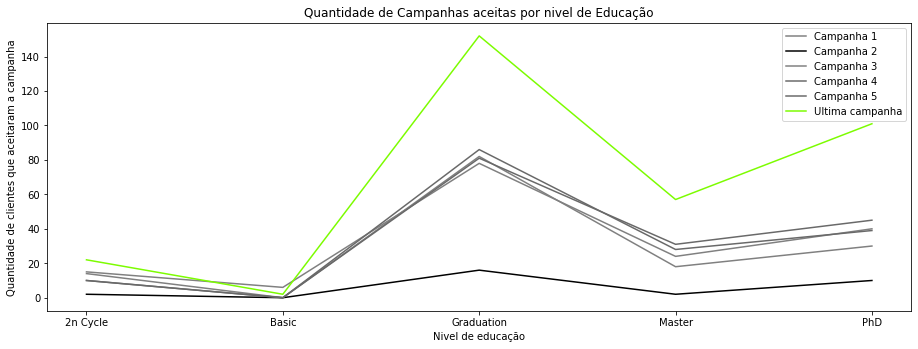

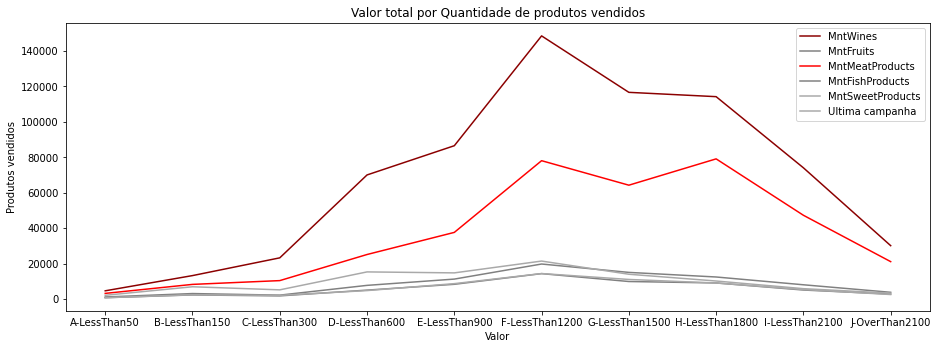

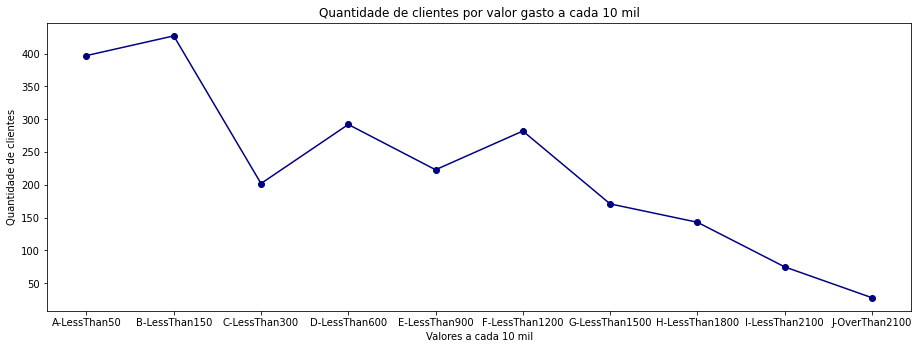

In [4]:
qtd_edu = db.groupby('Education').count().iloc[:,0]
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0,0,1,1])
x = qtd_edu.index
y = qtd_edu.values
plt.title("Nivel de Educação dos Clientes")
plt.xlabel("Tipo de educação")
plt.ylabel("Quantidade de clientes")
ax.bar(x,y,color ='teal')
plt.show()


qtd_mat = db.groupby('Marital_Status').count().iloc[:,0]
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0,0,1,1])
x = qtd_mat.index
y = qtd_mat.values
plt.title("Nivel de Matrimonio dos Clientes")
plt.xlabel("Tipo de matrimonio")
plt.ylabel("Quantidade de clientes")
ax.bar(x,y,color ='turquoise')
plt.show()

db.loc[db['Monetary'] < 50 ,'TotalValue'] = 'A-LessThan50'
db.loc[(db['Monetary'] >= 50) & (db['Monetary'] < 150) ,'TotalValue'] = 'B-LessThan150'
db.loc[(db['Monetary'] >= 150) & (db['Monetary'] < 300) ,'TotalValue'] = 'C-LessThan300'
db.loc[(db['Monetary'] >= 300) & (db['Monetary'] < 600) ,'TotalValue'] = 'D-LessThan600'
db.loc[(db['Monetary'] >= 600) & (db['Monetary'] < 900) ,'TotalValue'] = 'E-LessThan900'
db.loc[(db['Monetary'] >= 900) & (db['Monetary'] < 1200) ,'TotalValue'] = 'F-LessThan1200'
db.loc[(db['Monetary'] >= 1200) & (db['Monetary'] < 1500) ,'TotalValue'] = 'G-LessThan1500'
db.loc[(db['Monetary'] >= 1500) & (db['Monetary'] < 1800) ,'TotalValue'] = 'H-LessThan1800'
db.loc[(db['Monetary'] >= 1800) & (db['Monetary'] < 2100) ,'TotalValue'] = 'I-LessThan2100'
db.loc[db['Monetary'] >= 2100 ,'TotalValue'] = 'J-OverThan2100'
db = db.fillna(0)

db.loc[db['Income'] < 10000 ,'RangeIncome'] = 'A-LessThan10k'
db.loc[(db['Income'] >= 10000) & (db['Income'] < 20000) ,'RangeIncome'] = 'B-LessThan20k'
db.loc[(db['Income'] >= 20000) & (db['Income'] < 30000) ,'RangeIncome'] = 'C-LessThan30k'
db.loc[(db['Income'] >= 30000) & (db['Income'] < 40000) ,'RangeIncome'] = 'D-LessThan40k'
db.loc[(db['Income'] >= 40000) & (db['Income'] < 50000) ,'RangeIncome'] = 'E-LessThan50k'
db.loc[(db['Income'] >= 50000) & (db['Income'] < 60000) ,'RangeIncome'] = 'F-LessThan60k'
db.loc[(db['Income'] >= 60000) & (db['Income'] < 70000) ,'RangeIncome'] = 'G-LessThan70k'
db.loc[(db['Income'] >= 70000) & (db['Income'] < 80000) ,'RangeIncome'] = 'H-LessThan80k'
db.loc[(db['Income'] >= 80000) & (db['Income'] < 90000) ,'RangeIncome'] = 'I-LessThan90k'
db.loc[(db['Income'] >= 90000) & (db['Income'] < 100000) ,'RangeIncome'] = 'I-LessThan100k'
db.loc[db['Income'] >= 100000 ,'RangeIncome'] = 'J-OverThan100k'
db = db.fillna(0)

total_val = db.groupby('TotalValue').count()
total_val = total_val.iloc[:,0]

total_camp = db.groupby('Education').sum()
total_camp = total_camp[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']]
fig = plt.figure(figsize=(12, 4))
ax = fig.add_axes([0,0,1,1])
x = total_camp.index
plt.title("Quantidade de Campanhas aceitas por nivel de Educação")
ax.plot(x,total_camp.iloc[:,0],color ='gray',label='Campanha 1')
ax.plot(x,total_camp.iloc[:,1],color ='black',label='Campanha 2')
ax.plot(x,total_camp.iloc[:,2],color ='grey',label='Campanha 3')
ax.plot(x,total_camp.iloc[:,3],color ='dimgrey',label='Campanha 4')
ax.plot(x,total_camp.iloc[:,4],color ='dimgray',label='Campanha 5')
ax.plot(x,total_camp.iloc[:,5],color ='lawngreen',label='Ultima campanha')
plt.xlabel("Nivel de educação")
plt.ylabel("Quantidade de clientes que aceitaram a campanha")
plt.legend()
plt.show()

mat_prod = db.groupby('TotalValue').sum()
mat_prod = mat_prod[['MntWines','MntFruits', 'MntMeatProducts',  
                     'MntFishProducts' , 'MntSweetProducts', 'MntGoldProds']]

fig = plt.figure(figsize=(12, 4))
ax = fig.add_axes([0,0,1,1])
x = mat_prod.index
plt.title("Valor total por Quantidade de produtos vendidos")
ax.plot(x,mat_prod.iloc[:,0],color ='darkred',label='MntWines')
ax.plot(x,mat_prod.iloc[:,1],color ='gray',label='MntFruits')
ax.plot(x,mat_prod.iloc[:,2],color ='red',label='MntMeatProducts')
ax.plot(x,mat_prod.iloc[:,3],color ='grey',label='MntFishProducts')
ax.plot(x,mat_prod.iloc[:,4],color ='darkgray',label='MntSweetProducts')
ax.plot(x,mat_prod.iloc[:,5],color ='darkgrey',label='Ultima campanha')
plt.xlabel("Valor")
plt.ylabel("Produtos vendidos")
plt.legend()
plt.show()

fig = plt.figure(figsize=(12, 4))
ax = fig.add_axes([0,0,1,1])
x = total_val.index
y = total_val.values
plt.title("Quantidade de clientes por valor gasto a cada 10 mil")
plt.xlabel("Valores a cada 10 mil")
plt.ylabel("Quantidade de clientes")
ax.plot(x,y,color ='navy', marker='o')
plt.show()


#### Modificação dos dados e criação de Features
A modificação de dados foi feita para remover ou modificar dados que contiam informações importantes. Colunas do tipo data foram modificadas para números. Outros dados categóricos tambem foram alterados para números.
Foram criados 3 novas features: Age para a idade do cliente, TipoCliente para determinar qual ciclo de idade o cliente esta e Frequency para contabilizar a quantidade de compras dos clientes.

In [5]:
# Feature de idade do cliente
db['Age'] = (now.year - db['Year_Birth'])


#Categoria da coluna Education
db.Education = pd.Categorical(db.Education)
db['Education'] = db.Education.cat.codes

'''
dicionário:
2n Cycle = 0
Basic = 1
Graduation = 2
Master = 3
PhD = 4
'''
#Categoria da coluna TotalValue
db.TotalValue = pd.Categorical(db.TotalValue)
db['TotalValue'] = db.TotalValue.cat.codes


'''
'A-LessThan50' = 0
'B-LessThan150' = 1
'C-LessThan300' = 2
'D-LessThan600' = 3
'E-LessThan900' = 4
'F-LessThan1200' = 5
'G-LessThan1500' = 6
'H-LessThan1800' = 7
'I-LessThan2100' = 8
'J-OverThan2100' = 9
'''
#Categoria da coluna RangeIncome
db.RangeIncome = pd.Categorical(db.RangeIncome)
db['RangeIncome'] = db.RangeIncome.cat.codes

'''
A-LessThan10k = 0    
B-LessThan20k = 1  
C-LessThan30k = 2  
D-LessThan40k = 3   
E-LessThan50k = 4    
F-LessThan60k = 5    
G-LessThan70k = 6   
H-LessThan80k = 7    
I-LessThan100k = 8     
I-LessThan90k = 9   
J-OverThan100k = 10   
'''
#Categoria da coluna Marital_Status
db.Marital_Status = pd.Categorical(db.Marital_Status)
db['Marital_Status'] = db.Marital_Status.cat.codes
'''
Absurd = 0                
Alone = 1                  
Divorced = 2              
Married = 3               
Single = 4                 
Together = 5               
Widow = 6                 
YOLO = 7 
'''

db['Freq'] = db['NumWebPurchases'] + db['NumCatalogPurchases'] + db['NumStorePurchases'] 

#### Features RFM: Recencia, Frequencia e valor monetário
Essas features foram criadas para determinar um Score para os clientes baseado na recencia, frequencia e valor monetário.

In [6]:

quantiles = db.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()
def RScoring(x, p, d):
    if x <= d[p][0.20]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]:
        return 2
    else:
        return 1

def FnMScoring(x, p, d):
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]:
        return 4
    else:
        return 5

db['R'] = db['Recency'].apply(RScoring, args=('Recency', quantiles,))
db['F'] = db['Freq'].apply(FnMScoring, args=('Freq', quantiles,))
db['M'] = db['Monetary'].apply(FnMScoring, args=('Monetary', quantiles,))
db['RFMGroup'] = db.R.map(str) + db.F.map(str) + db.M.map(str)
db['RFMGroup'] = db['RFMGroup'].astype(int)

db['RFMScore'] = db[['R', 'F', 'M']].sum(axis=1)

db = db.drop(['ID','Year_Birth','Dt_Customer','Income','Z_CostContact','Z_Revenue'],axis=1)


#### Aplicando o Metodo Elbow
O metodo Elbow é utilizado encontrar o valor ideal do parâmetro k. Ele testa a variância dos dados em relação ao número de clusters. É considerado um valor ideal de k quando o aumento no número de clusters não representa um valor significativo de ganho.

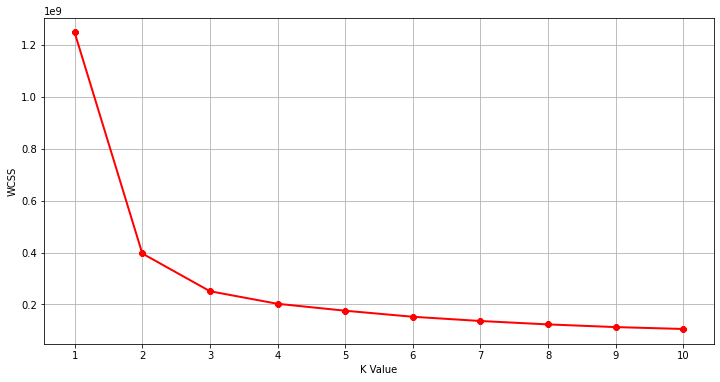

In [7]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(db)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

#### Modelo de Clusterização para segmentação de clientes
Atravéz do método de Elbow podemos definir o número de clusters igual a 4.

In [8]:
km = KMeans(n_clusters=4, max_iter=1000, n_init=10, init='k-means++', random_state=42)
clusters = km.fit_predict(db)
db["Cluster"] = clusters


#### Gráfico demonstrativo dos grupos criados pelo modelo Kmeans

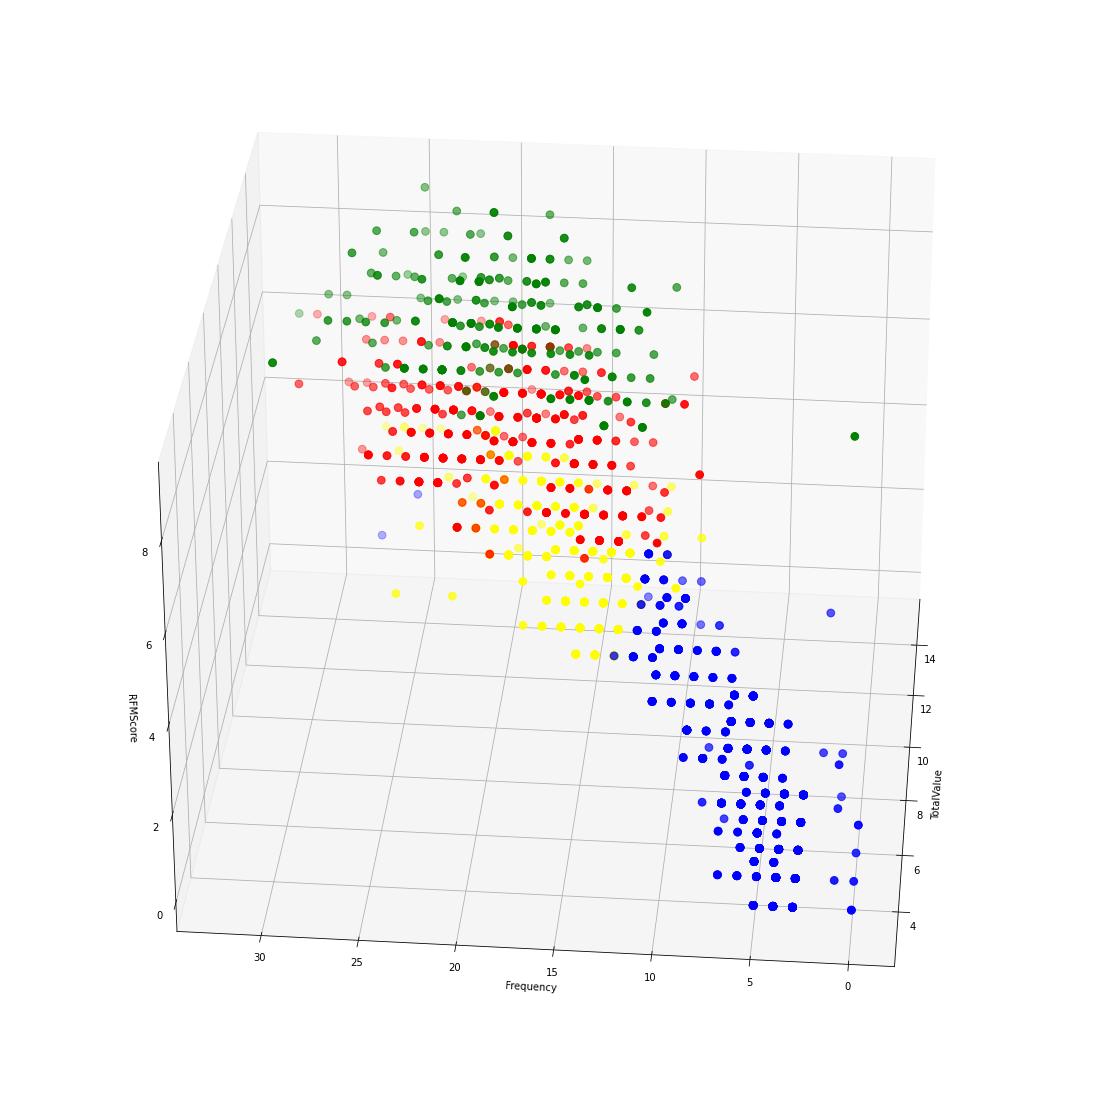

In [9]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(db.RFMScore[db.Cluster == 0], db["Freq"][db.Cluster == 0], db["TotalValue"][db.Cluster == 0], c='blue', s=60)
ax.scatter(db.RFMScore[db.Cluster == 1], db["Freq"][db.Cluster == 1], db["TotalValue"][db.Cluster == 1], c='red', s=60)
ax.scatter(db.RFMScore[db.Cluster == 2], db["Freq"][db.Cluster == 2], db["TotalValue"][db.Cluster == 2], c='green', s=60)
ax.scatter(db.RFMScore[db.Cluster == 3], db["Freq"][db.Cluster == 3], db["TotalValue"][db.Cluster == 3], c='yellow', s=60)

ax.view_init(30, 185)
plt.xlabel("TotalValue")
plt.ylabel("Frequency")
ax.set_zlabel('RFMScore')
plt.show()

#### Análise de resultados
Nesta etapa analisamos os clusters e identificando suas caracteristicas

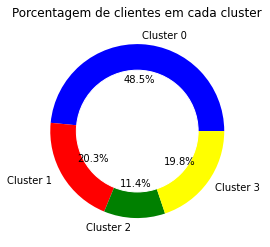

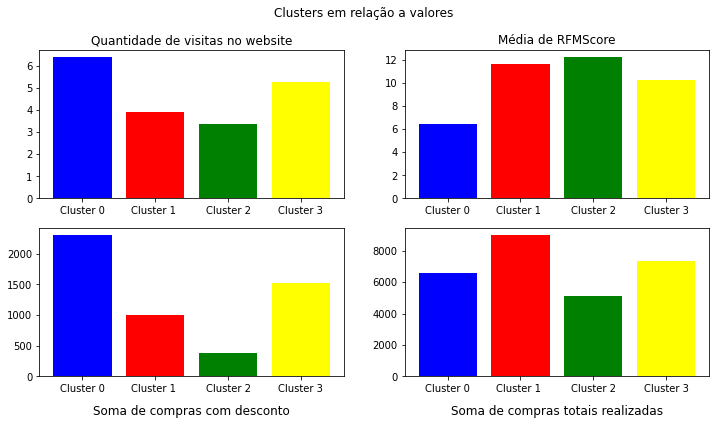

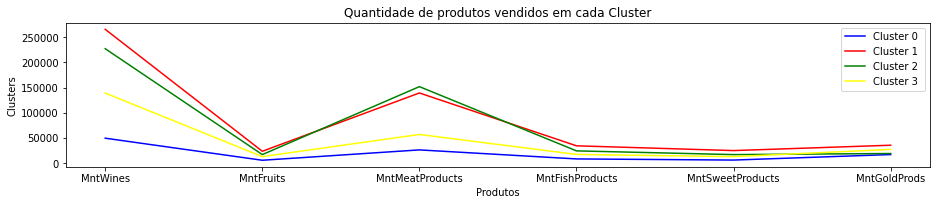

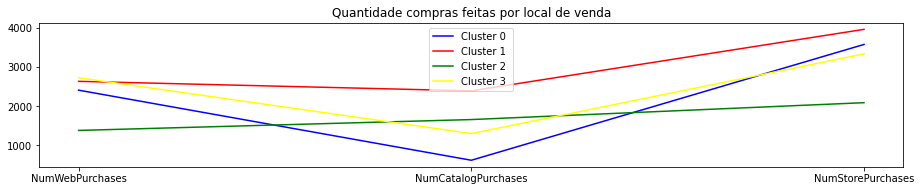

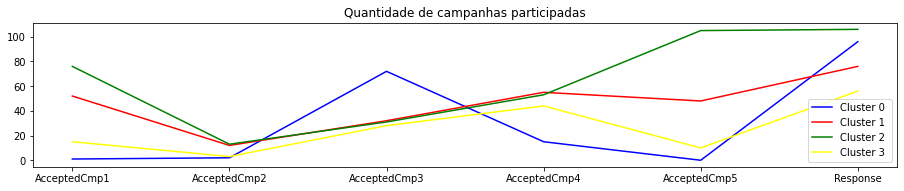

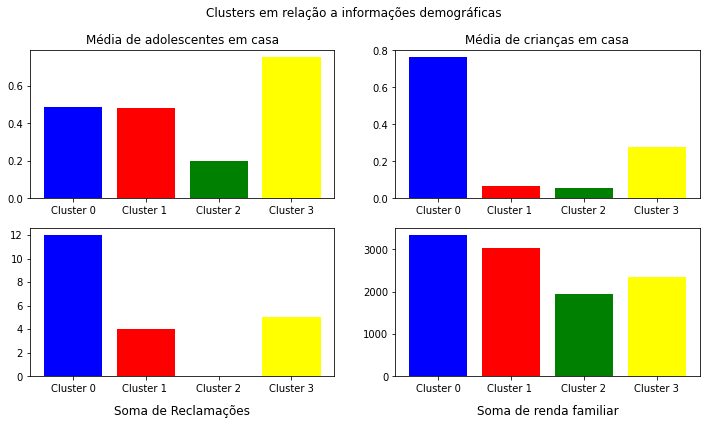

In [10]:
names = ['Cluster 0 ', 'Cluster 1 ', 'Cluster 2 ', 'Cluster 3 ']

marks = [db.query('Cluster == 0').count().values[0], db.query('Cluster == 1').count().values[0], db.query('Cluster == 2').count().values[0], db.query('Cluster == 3').count().values[0]]
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(marks, labels=names, autopct='%1.1f%%',
        colors=['blue', 'red', 'green', 'yellow'])
  
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Porcentagem de clientes em cada cluster")
plt.show()

g1 = db.query('Cluster == 0')
g2 = db.query('Cluster == 1')
g3 = db.query('Cluster == 2')
g4 = db.query('Cluster == 3')


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
x = ['Cluster 0', 'Cluster 1 ', 'Cluster 2', 'Cluster 3']
y1 = [g1['NumWebVisitsMonth'].mean(),g2['NumWebVisitsMonth'].mean(),g3['NumWebVisitsMonth'].mean(),g4['NumWebVisitsMonth'].mean()]
y2 = [g1['RFMScore'].mean(),g2['RFMScore'].mean(),g3['RFMScore'].mean(),g4['RFMScore'].mean()]
y3 = [g1['NumDealsPurchases'].sum(),g2['NumDealsPurchases'].sum(),g3['NumDealsPurchases'].sum(),g4['NumDealsPurchases'].sum()]
y4 = [g1['Freq'].sum(),g2['Freq'].sum(),g3['Freq'].sum(),g4['Freq'].sum()]


plt.suptitle('Clusters em relação a valores')
plt.subplot(2, 2, 1)
plt.bar(x, y1,color=['blue', 'red', 'green', 'yellow'])
plt.title('Quantidade de visitas no website')

plt.subplot(2, 2, 2)
plt.bar(x, y2, color=['blue', 'red', 'green', 'yellow'])
plt.title('Média de RFMScore')

plt.subplot(2, 2, 3)
plt.bar(x, y3, color=['blue', 'red', 'green', 'yellow'])
plt.title('Soma de compras com desconto',y=-0.30)

plt.subplot(2, 2, 4)
plt.title('Soma de compras totais realizadas',y=-0.30)
plt.bar(x, y4,color=['blue', 'red', 'green', 'yellow'])
plt.show()


clus_prod = db.groupby('Cluster').sum()
clus_prod = clus_prod[['MntWines','MntFruits', 'MntMeatProducts',  
                     'MntFishProducts' , 'MntSweetProducts', 'MntGoldProds']]
clus_prod = clus_prod.transpose()

fig = plt.figure(figsize=(12, 2))
ax = fig.add_axes([0,0,1,1])
x = clus_prod.index
plt.title("Quantidade de produtos vendidos em cada Cluster")
ax.plot(x,clus_prod.iloc[:,0],color ='blue',label='Cluster 0 ')
ax.plot(x,clus_prod.iloc[:,1],color ='red',label='Cluster 1')
ax.plot(x,clus_prod.iloc[:,2],color ='green',label='Cluster 2')
ax.plot(x,clus_prod.iloc[:,3],color ='yellow',label='Cluster 3')
plt.xlabel("Produtos")
plt.ylabel("Clusters")
plt.legend()
plt.show()

clus_comp = db.groupby('Cluster').sum()
clus_comp = clus_comp[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']]
clus_comp = clus_comp.transpose()

fig = plt.figure(figsize=(12, 2))
ax = fig.add_axes([0,0,1,1])
x = clus_comp.index
plt.title("Quantidade compras feitas por local de venda")
ax.plot(x,clus_comp.iloc[:,0],color ='blue',label='Cluster 0 ')
ax.plot(x,clus_comp.iloc[:,1],color ='red',label='Cluster 1')
ax.plot(x,clus_comp.iloc[:,2],color ='green',label='Cluster 2')
ax.plot(x,clus_comp.iloc[:,3],color ='yellow',label='Cluster 3')
plt.legend()
plt.show()

clus_camp = db.groupby('Cluster').sum()
clus_camp = clus_camp[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']]
clus_camp = clus_camp.transpose()

fig = plt.figure(figsize=(12, 2))
ax = fig.add_axes([0,0,1,1])
x = clus_camp.index
plt.title("Quantidade de campanhas participadas")
ax.plot(x,clus_camp.iloc[:,0],color ='blue',label='Cluster 0 ')
ax.plot(x,clus_camp.iloc[:,1],color ='red',label='Cluster 1')
ax.plot(x,clus_camp.iloc[:,2],color ='green',label='Cluster 2')
ax.plot(x,clus_camp.iloc[:,3],color ='yellow',label='Cluster 3')
plt.legend()
plt.show()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
x = ['Cluster 0', 'Cluster 1 ', 'Cluster 2', 'Cluster 3']
y1 = [g1['Teenhome'].mean(),g2['Teenhome'].mean(),g3['Teenhome'].mean(),g4['Teenhome'].mean()]
y2 = [g1['Kidhome'].mean(),g2['Kidhome'].mean(),g3['Kidhome'].mean(),g4['Kidhome'].mean()]
y3 = [g1['Complain'].sum(),g2['Complain'].sum(),g3['Complain'].sum(),g4['Complain'].sum()]
y4 = [g1['RangeIncome'].sum(),g2['RangeIncome'].sum(),g3['RangeIncome'].sum(),g4['RangeIncome'].sum()]


plt.suptitle('Clusters em relação a informações demográficas')
plt.subplot(2, 2, 1)
plt.bar(x, y1,color=['blue', 'red', 'green', 'yellow'])
plt.title('Média de adolescentes em casa')

plt.subplot(2, 2, 2)
plt.bar(x, y2, color=['blue', 'red', 'green', 'yellow'])
plt.title('Média de crianças em casa')

plt.subplot(2, 2, 3)
plt.bar(x, y3, color=['blue', 'red', 'green', 'yellow'])
plt.title('Soma de Reclamações',y=-0.30)

plt.subplot(2, 2, 4)
plt.title('Soma de renda familiar',y=-0.30)
plt.bar(x, y4,color=['blue', 'red', 'green', 'yellow'])
plt.show()




In [11]:
db.groupby('Cluster').mean()

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Monetary,TotalValue,RangeIncome,Age,Freq,R,F,M,RFMGroup,RFMScore
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.274401,3.715470,0.762431,0.487109,49.165746,45.513812,5.207182,24.122468,7.629834,5.553407,...,103.631676,0.930939,3.071823,51.225599,6.081031,3.014733,1.660221,1.758748,319.834254,6.433702
1,2.448352,3.709890,0.065934,0.483516,49.560440,583.329670,51.624176,305.885714,75.417582,54.632967,...,1148.859341,5.325275,6.639560,55.395604,19.760440,2.973626,4.248352,4.419780,344.265934,11.641758
2,2.650980,3.807843,0.054902,0.200000,51.576471,890.180392,66.270588,595.011765,95.113725,66.168627,...,1787.329412,7.458824,7.584314,53.803922,20.098039,2.894118,4.341176,5.000000,337.823529,12.235294
3,2.481982,3.740991,0.277027,0.752252,47.092342,313.011261,28.995495,128.074324,38.743243,28.961712,...,598.972973,3.495495,5.286036,55.403153,16.583333,3.121622,3.709459,3.418919,352.675676,10.250000


#### Conclusão
Depois da análise feita dos resultados do modelo de clusterização foram identificados 4 Tipos de clientes.
    <br>Cluster 0: Cliente Insatisfeito
    <br>Cluster 1: Cliente Em Ascenção
    <br>Cluster 2: Cliente Ouro
    <br>Cluster 3: Cliente Regular
    <br>
        <br>
     <b>Cliente Insatisfeito:</b> O cliente insatisfeito possui uma alta quantidade de reclamações, grande quantidade de pessoas em casa, porém possui uma renda familiar de valor alto. Esse cliente não possui grande quantidade de compras nos produtos e as quantidades não tem muita variação, por se tratar de uma familia, todos os produtos são indicados a esse cliente. Esse cliente não possui um score muito alto, e é bem propenso a comprar com descontos, porém ele não aceita todas as campanhas. A melhor forma de venda para esse cliente é atravéz do website.
        <br>
         <br>
     <b>Cliente Em Ascenção:</b> O cliente em ascenção é um cliente que pode se tornar ouro. Ele possui um score alto e grandes quantidades de compras. Não possui muitas reclamações e sua renda familiar também é alta. Possui um número rasoavel de pessoas em casa e participa de quase todas as campanhas. Também interage bastante com todas as formas de vendas. Os produtos indicados para esse cliente são os vinhos e carnes.
        <br>
         <br>
     <b>Cliente Ouro:</b> O cliente ouro é o cliente que está satisfeito com a empresa. Ele possui um score de valor alto, não efetua muitas compras com desconto e interage por todas as formas de vendas. Ele também não fez nenhuma reclamação da empresa e possui uma renda familiar e participação em campanhas regular. Os melhores produtos indicados para esse cliente são os vinhos e carnes.
        <br>
         <br>
     <b>Cliente Regular:</b> O cliente regular é o cliente que está satisfeito com a empresa porém pode se tornar um cliente insatisfeito. Ele possui reclamações, sua renda familiar é mediana e não participar de todas as campanhas. Ele também prefere comprar com descontos e prefere comprar no site e na loja. Porém o seu score é bom e tem uma grande quantidade de compras, além de possuir muitas pessoas em sua familia. O melhor produto para esse cliente é o vinho e a melhor forma de venda é atravéz do website.